<a href="https://colab.research.google.com/github/Rayjunqueira/analise_dados_devedores_divida_ativa_brasileira_matplotlib_pandas/blob/main/an%C3%A1lisedivida_brasileira_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Importando csv da pasta driver

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv('/content/drive/MyDrive/devedores_divida_brasil.csv',
                   sep=';', encoding='latin1', on_bad_lines='skip')

# Limpeza de dados

In [27]:
data['SALDO DEVEDOR SEM HONORÁRIOS'] = (
    data['SALDO DEVEDOR SEM HONORÁRIOS']
    .str.replace('R\$\s?', '', regex=True)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
)

data['SALDO DEVEDOR SEM HONORÁRIOS'] = pd.to_numeric(data['SALDO DEVEDOR SEM HONORÁRIOS'], errors='coerce')


In [28]:
data = data.dropna(subset=[
    'SALDO DEVEDOR SEM HONORÁRIOS', 'CREDOR', 'NOME DO DEVEDOR'
])

# Perfil dos devedores

In [31]:
plt.figure(figsize=(14, 5))


<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

**Distribuição por tipo de pessoa**

Text(0, 0.5, '')

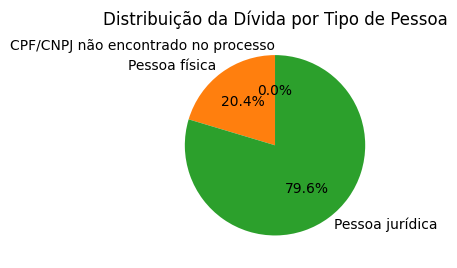

In [32]:
plt.subplot(1, 2, 1)
data.groupby('TIPO DE PESSOA')['SALDO DEVEDOR SEM HONORÁRIOS'].sum().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, title='Distribuição da Dívida por Tipo de Pessoa'
)
plt.ylabel('')

**Tipo do devedor**

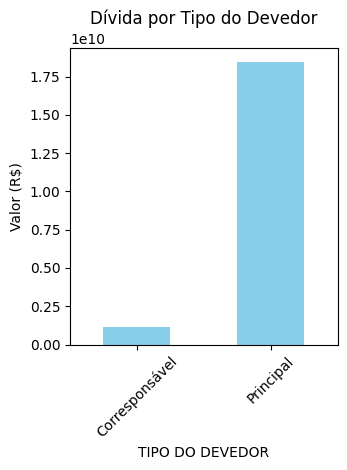

In [33]:
plt.subplot(1, 2, 2)
data.groupby('TIPO DO DEVEDOR')['SALDO DEVEDOR SEM HONORÁRIOS'].sum().plot(
    kind='bar', color='skyblue'
)
plt.title('Dívida por Tipo do Devedor')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Top 10 devedores**

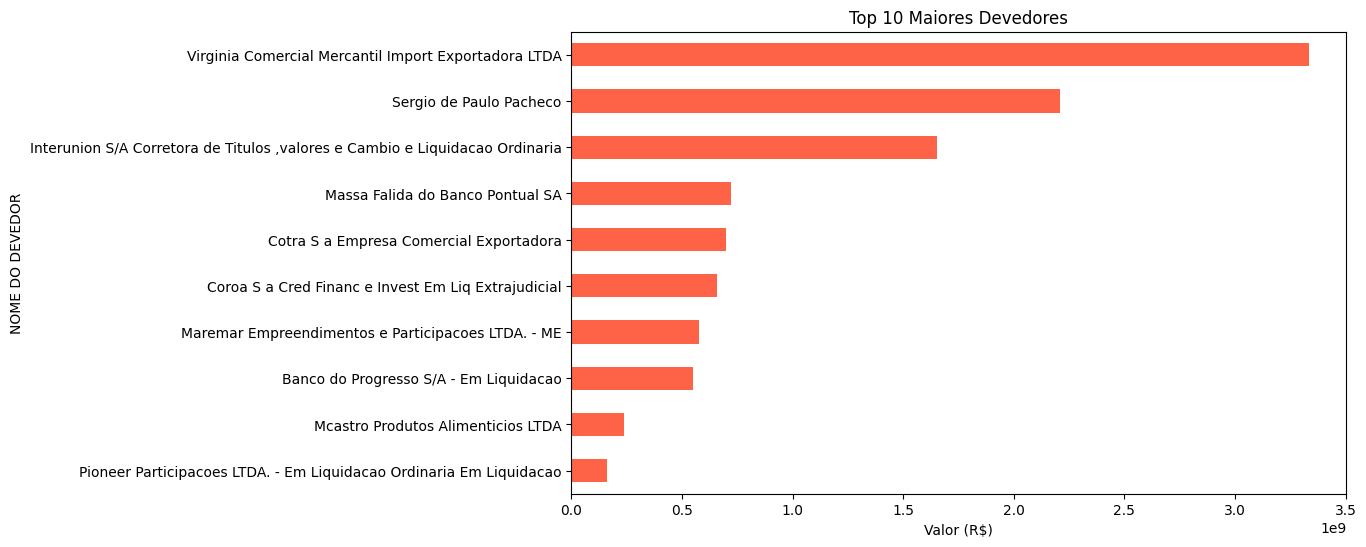

In [34]:
top_devedores = data.groupby('NOME DO DEVEDOR')['SALDO DEVEDOR SEM HONORÁRIOS'].sum().sort_values(ascending=False).head(10)
top_devedores.plot(kind='barh', figsize=(10, 6), color='tomato', title='Top 10 Maiores Devedores')
plt.xlabel('Valor (R$)')
plt.gca().invert_yaxis()
plt.show()

# Análise por credores

**Total por credor**

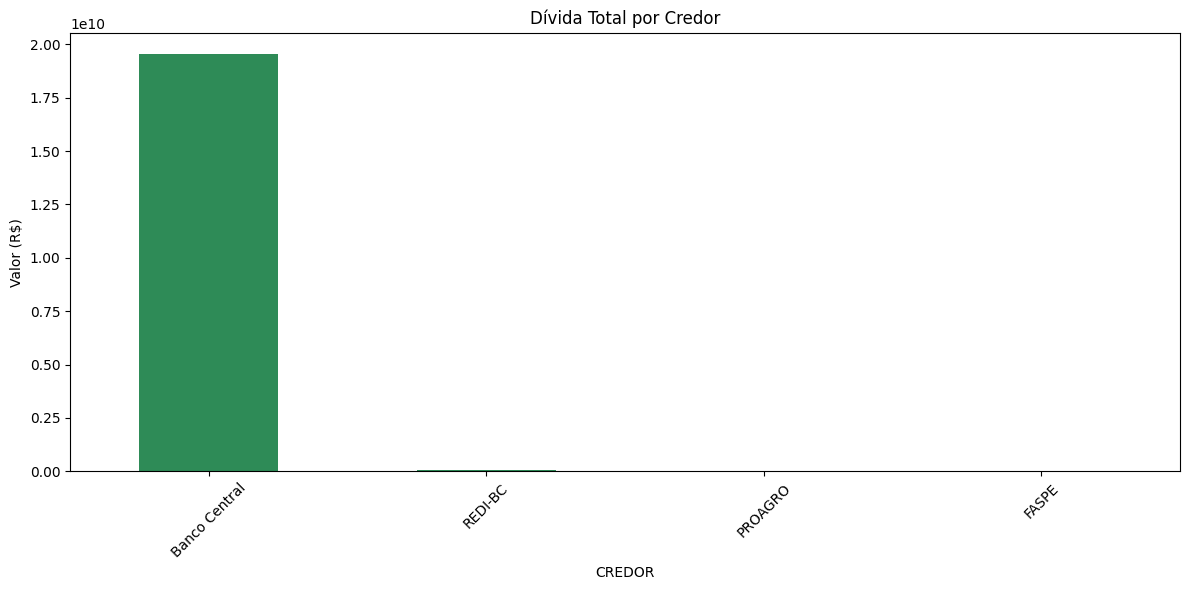

In [35]:
divida_por_credor = data.groupby('CREDOR')['SALDO DEVEDOR SEM HONORÁRIOS'].sum().sort_values(ascending=False)
divida_por_credor.plot(kind='bar', figsize=(12, 6), color='seagreen', title='Dívida Total por Credor')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 5 credores**

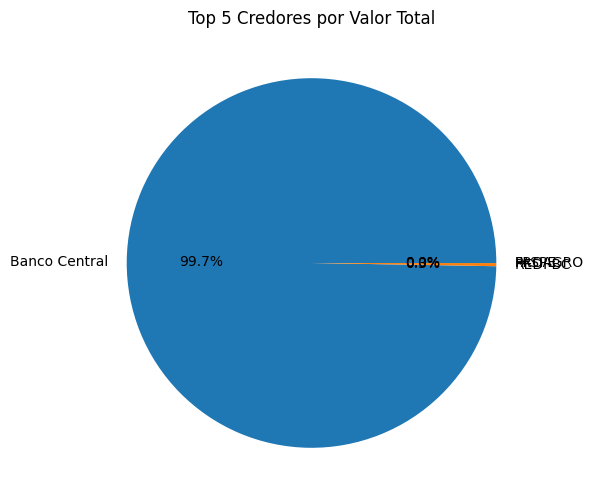

In [36]:
divida_por_credor.head(5).plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Top 5 Credores por Valor Total')
plt.ylabel('')
plt.show()

# Situação de crédito

In [37]:
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

**Valor total por situação**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Em execução'),
  Text(1, 0, 'Não executado'),
  Text(2, 0, 'Parcelado'),
  Text(3, 0, 'Suspenso')])

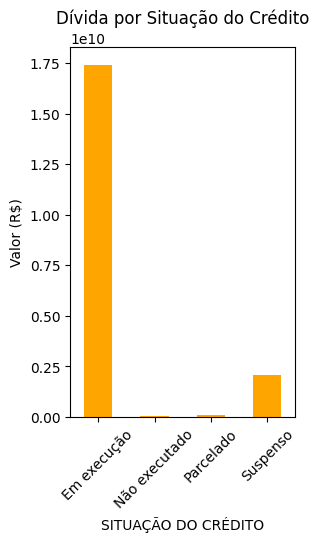

In [38]:
plt.subplot(1, 2, 1)
data.groupby('SITUAÇÃO DO CRÉDITO')['SALDO DEVEDOR SEM HONORÁRIOS'].sum().plot(
    kind='bar', color='orange', title='Dívida por Situação do Crédito'
)
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)


**Valor médio por situação**

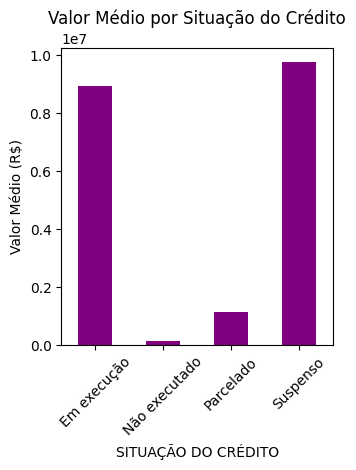

In [39]:
plt.subplot(1, 2, 2)
data.groupby('SITUAÇÃO DO CRÉDITO')['SALDO DEVEDOR SEM HONORÁRIOS'].mean().plot(
    kind='bar', color='purple', title='Valor Médio por Situação do Crédito'
)
plt.ylabel('Valor Médio (R$)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Análise temporal

In [40]:
data['DATA DA INSCRIÇÃO'] = pd.to_datetime(data['DATA DA INSCRIÇÃO'], errors='coerce', dayfirst=True)

In [41]:
data['ANO_INSCRICAO'] = data['DATA DA INSCRIÇÃO'].dt.year


**Valor total por ano**

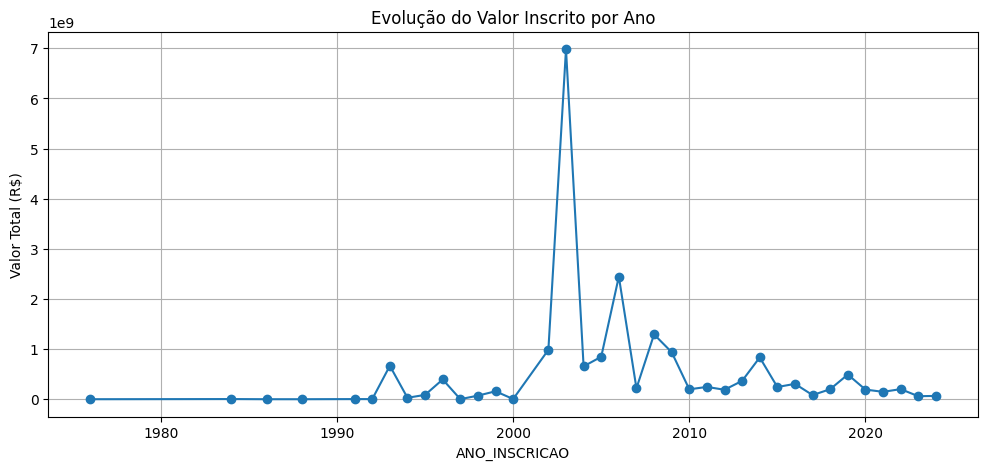

In [42]:
ano_agrupado = data.groupby('ANO_INSCRICAO')['SALDO DEVEDOR SEM HONORÁRIOS'].sum()

ano_agrupado.plot(kind='line', marker='o', figsize=(12, 5), title='Evolução do Valor Inscrito por Ano')
plt.ylabel('Valor Total (R$)')
plt.grid(True)
plt.show()

# Estatísticas e Insights

**Valor total da dívida ativa**

In [43]:
total_geral = data['SALDO DEVEDOR SEM HONORÁRIOS'].sum()
print(f"💰 Valor total da dívida ativa no dataset: R$ {total_geral:,.2f}")

💰 Valor total da dívida ativa no dataset: R$ 19,611,798,842.39


**Maior dívida individual (por devedor)**

In [44]:
maior_devedor = data.groupby('NOME DO DEVEDOR')['SALDO DEVEDOR SEM HONORÁRIOS'].sum().idxmax()
maior_valor = data.groupby('NOME DO DEVEDOR')['SALDO DEVEDOR SEM HONORÁRIOS'].sum().max()
print(f"🏦 Maior devedor individual: {maior_devedor} — R$ {maior_valor:,.2f}")

🏦 Maior devedor individual: Virginia Comercial Mercantil Import Exportadora LTDA — R$ 3,335,982,264.91


**Credor com maior volume de dívidas**

In [45]:
maior_credor = divida_por_credor.idxmax()
valor_maior_credor = divida_por_credor.max()
print(f"🏛️ Credor com maior valor a receber: {maior_credor} — R$ {valor_maior_credor:,.2f}")


🏛️ Credor com maior valor a receber: Banco Central — R$ 19,557,207,019.50


**Percentual de pessoas físicas vs jurídicas**

In [46]:
pessoa_pct = data['TIPO DE PESSOA'].value_counts(normalize=True) * 100
print(f"\n📉 Distribuição de tipos de pessoa:")
for tipo, pct in pessoa_pct.items():
    print(f" - {tipo}: {pct:.1f}% dos registros")


📉 Distribuição de tipos de pessoa:
 - Pessoa jurídica: 63.3% dos registros
 - Pessoa física: 36.5% dos registros
 - CPF/CNPJ não encontrado no processo: 0.1% dos registros


**Ano com maior valor inscrito**

In [47]:
ano_top = ano_agrupado.idxmax()
valor_top = ano_agrupado.max()
print(f"\n📅 Ano com maior valor inscrito: {ano_top} — R$ {valor_top:,.2f}")


📅 Ano com maior valor inscrito: 2003 — R$ 6,983,129,106.80


**Devedores em situação "parcelado"**

In [48]:
parcelado_count = data[data['SITUAÇÃO DO CRÉDITO'] == 'Parcelado'].shape[0]
print(f"\n📦 Total de registros com dívida parcelada: {parcelado_count}")


📦 Total de registros com dívida parcelada: 82


# Conclusões

**A maior parte da dívida está concentrada em poucas instituições (credores)**

**Devedores Pessoa Física representam uma grande parcela do total.**

**Algumas situações como 'Parcelado' são muito recorrentes.**

**A inscrição de novas dívidas tem picos em anos específicos — sugerindo políticas ou eventos econômicos específicos.**